## Model: Gaussian Naive Bayes
## Group Name: Gradient Descenters
## Zachk Huang
## Zixi (Valerie) Li

## Overview of Guassian Naive Bayes

Gaussian Naive Bayes (GNB) is one of those algorithms that seems almost too simple at first glance. However, it consistently performs well on a wide range of real-world problems. At its core, GNB is a probabilistic classifier based on Bayes’ rule, with two key modeling decisions:
(1) each feature is assumed to be independent of the others given the class label, and
(2) each feature is modeled using a Gaussian (normal) distribution within each class (Domingos & Pazzani, 1997; Murphy, 2012, pp. 82–87).

Because of these assumptions, the model can compute everything it needs such as class priors, feature means, and variances, using closed-form formulas. No iterative optimization, no gradient descent. This makes GNB incredibly fast to train, even on very large datasets.

Intuitively, the algorithm asks: “Given this feature value, how likely is it to come from each class’s Gaussian distribution?” Then it multiplies (or, in practice, sums log values of) those likelihoods across features and chooses the class with the highest posterior probability. Nevertheless, even though its reasoning is mathematically straightforward, the model often captures surprisingly good structure in the data, especially when classes form relatively clean, normally distributed clusters.

## Advantages & Disadvantages of Gaussian Naive Bayes

Gaussian Naive Bayes has a number of practical advantages that explain why it remains a widely used and well-liked algorithm, even in an era dominated by more complex models. One of the biggest strengths is its simplicity because its training requires only computing class frequencies, feature means, and variances, so the model can be fit in a fraction of a second. This makes GNB especially appealing for very large datasets, streaming scenarios, or as a quick baseline before trying heavier models. 

The algorithm also tends to perform surprisingly well when the amount of data is limited, because it estimates only a small number of parameters and therefore does not overfit easily. Its probabilistic outputs are normally intuitive to interpret, and they can be helpful in settings where understanding uncertainty matters. Another advantage is that the model handles irrelevant features fairly gracefully, because each feature contributes independently, noisy or uninformative dimensions do not disrupt the model as severely as they might in other classifiers.

At the same time, these strengths come with clear trade-offs. The most fundamental limitation is the “naive” independence assumption that GNB pretends that all features are unrelated once the class is known, and this is rarely true in real data. When features are highly correlated, such as petal measurements in the Iris dataset that we use below, the model can produce distorted likelihoods or overconfident predictions. 

Another limitation is that GNB assumes each feature follows a nice, bell-shaped Gaussian curve within each class. Sometimes that’s roughly true, but a lot of real data just isn’t that clean because features might be skewed, have multiple peaks, or be categorical in ways that don’t fit a Gaussian at all. And because the model treats each feature on its own, the decision boundaries it learns end up being fairly simple. They work well when the classes are nicely separated, but they can miss the more tangled, nonlinear patterns that models like random forests, SVMs, or neural networks pick up easily. For that reason, Gaussian Naive Bayes is often used as a fast and interpretable starting point. It’s great for quick experiments and can be surprisingly strong in some settings, but it’s usually not the model we rely on when people need the absolute best accuracy on complicated datasets.

## Representation

In Gaussian Naive Bayes (GNB), the representation focuses on converting a feature vector $ x = (x_1, \ldots, x_d) $ into a single predicted class label by evaluating how likely each class is under a simple probabilistic model. The model assumes that once the class $ y = k $ is known, every feature is conditionally independent, which is a strong but useful simplification known as the naive conditional independence assumption (Domingos & Pazzani, 1997). Again, the key modeling assumption is conditional independence: once we know the class label, the individual features behave independently. This simplifies the joint likelihood to a product of per-feature likelihoods, which can be shown as:

$$
P(x \mid y = k) = \prod_{j=1}^{d} P(x_j \mid y = k)
$$

Gaussian Naive Bayes assumes each feature follows a normal distribution inside each class:

$$
x_j \mid y = k \sim \mathcal{N}(\mu_{k,j},\, \sigma_{k,j}^2)
$$


Therefore, the likelihood for a single feature can be denoted as:

$$
P(x_j \mid y = k) = 
\frac{1}{\sqrt{2\pi\sigma_{k,j}^2}}
\exp\!\left(
    -\frac{(x_j - \mu_{k,j})^2}{2\sigma_{k,j}^2}
\right)
$$

Then, during prediction, GNB computes an unnormalized log-posterior, which is summing across all logs instead of multiplying all these very small probabilities:

$$
\log P(y = k \mid x) = 
\log P(y = k) +
\sum_{j=1}^d \log P(x_j \mid y = k)
$$


After exponentiating and normalizing across classes per Professor's instruction, we obtain real posterior probabilities which are more interpretable:

$$
P(y = k \mid x)
= 
\frac{
\exp(\log P(y = k \mid x))
}{
\sum_{k'} \exp(\log P(y = k' \mid x))
}
$$


Finally, the predicted label is the class with the highest posterior:

$$
\hat{y} = \arg\max_k P(y = k \mid x)
$$


In this sense, "representation" in GNB is entirely distribution-based in the sense that the model summarizes the training data using means, variances, and class frequencies, then uses probability theory to turn these summaries into a single predicted class label.


## Loss
Gaussian Naive Bayes does not explicitly define or minimize a loss function during training. Instead, the parameters it learns, such as class priors, means, and variances, are the closed-form solutions to a Maximum Likelihood Estimation (MLE) problem. The idea is to choose parameter values that make the observed training data as probable as possible under the assumed Gaussian model.

The class prior is estimated by simply counting how often each class appears:

$$
P(y = k) = \frac{\#\{i : y_i = k\}}{N}
$$

The model then fits a Gaussian to each feature within each class. For each class $ k $:

$$
\mu_{k,j}
= 
\frac{1}{N_k} \sum_{i: y_i = k} x_{i,j}
$$

$$
\sigma_{k,j}^2 
= 
\frac{1}{N_k} \sum_{i: y_i = k} (x_{i,j} - \mu_{k,j})^2
$$


Although we don’t explicitly define a “loss” the way we do with logistic regression or neural networks, the model is effectively maximizing the total log-likelihood of the data:

$$
\mathcal{L}(\theta) 
=
\sum_{i=1}^{N}
\left[
\log P(y_i)
+
\sum_{j=1}^{d} \log P(x_{i,j} \mid y_i)
\right]
$$

If we wanted to express this in loss-function form, we could simply take the negative:

$$
\text{Loss}(\theta)
= 
- \mathcal{L}(\theta)
$$

But the important point is that GNB never performs iterative optimization. Its parameter estimates are calculated directly from simple sample statistics. This makes the model extremely fast, but also means its performance depends heavily on how well the Gaussian and independence assumptions match the real data, which can be challenging at times.

## Optimizer

Gaussian Naive Bayes is unusual among machine learning classifiers because it has no optimizer in the traditional sense as there is no gradient descent, no learning rate, no iterative improvement. Instead, all parameters are determined through analytic formulas derived from the MLE framework. Once we compute the required counts, means, and variances, the training procedure is complete.

The optimizer consists only of computing:
1. Class priors:
$$
\hat{P}(y = k) = \frac{N_k}{N}
$$

2. Class conditional Gaussian parameters:

$$
\hat{\mu}_{k,j} = \frac{1}{N_k} \sum_{i: y_i = k} x_{i,j}
$$

$$
\hat{\sigma}_{k,j}^2
=
\frac{1}{N_k}
\sum_{i : y_i = k}
(x_{i,j} - \hat{\mu}_{k,j})^2
+ \epsilon
$$

The small constant $ \epsilon $ is added for numerical stability so that zero-variance features do not break the Gaussian density computation.

Because training involves only computing summary statistics, GNB is a lot of times extremely efficient, even on larger datasets. This makes it an appealing baseline model because it is indeed easy to train, fast to evaluate, and mathematically transparent. The downside is that the model cannot refine its parameters through an optimization loop, so if the Gaussian or independence assumptions don’t hold, the model cannot adapt or compensate automatically.


In [1]:
import numpy as np
import pandas as pd

class NaiveBayes(object):
    """ Gaussian Naive Bayes model
    
    @attrs:
        n_classes:    the number of classes
        attr_dist:    a 2D (n_classes x n_attributes) NumPy array of the attribute distributions
        label_priors: a 1D NumPy array of the priors distribution
        means:        mean per class and feature
        vars:         variance per class and feature
    """

    def __init__(self, n_classes):
        """ Initializes a NaiveBayes model with n_classes. """
        self.n_classes = n_classes
        self.means = None          
        self.vars = None  
        self.label_priors = None

    def train(self, X_train, y_train):
        """ Trains the model, using maximum likelihood estimation.
        For Gaussian NB: estimate class priors, means, and variances.
        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        @return:
            a tuple consisting of:
                1) a 2D numpy array of the attribute distributions
                2) a 1D numpy array of the priors distribution
        """
        n_samples, n_features = X_train.shape

        # ---- 1. Estimate class priors----
        counts = np.bincount(y_train, minlength=self.n_classes)
        self.label_priors = counts / n_samples  

        # ---- 2. Estimate means and variances for each class and feature ----
        self.means = np.zeros((self.n_classes, n_features))
        self.vars = np.zeros((self.n_classes, n_features))

        for c in range(self.n_classes):
            X_c = X_train[y_train == c]  
            self.means[c, :] = np.mean(X_c, axis=0)
            self.vars[c, :] = np.var(X_c, axis=0) + 1e-9

        return self.means, self.vars, self.label_priors

    def predict_proba(self, inputs):
        """Return posterior class probabilities for each input."""
        n_samples = inputs.shape[0]
        log_priors = np.log(self.label_priors)
        probs = np.zeros((n_samples, self.n_classes))
        for i in range(n_samples):
            x = inputs[i]
            log_probs = np.zeros(self.n_classes)
            for c in range(self.n_classes):
                mean_c = self.means[c]
                var_c = self.vars[c]
                log_probs[c] = log_priors[c] - 0.5 * np.sum(
                    np.log(2 * np.pi * var_c) + ((x - mean_c) ** 2) / var_c
                )
            joint = np.exp(log_probs)
            probs[i] = joint / joint.sum()
        return probs

    def predict(self, inputs):
        """ Outputs a predicted label for each input in inputs.
        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 1D numpy array of predictions
        """
        posteriors = self.predict_proba(inputs)
        return np.argmax(posteriors, axis=1)

    def accuracy(self, X_test, y_test):
        """ Outputs the accuracy of the trained model on a given dataset (data).

        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """

        predictions = self.predict(X_test)
        correct = np.sum(predictions == y_test)
        total = y_test.shape[0]
        accuracy = correct / total
        return accuracy


### Check Model

#### Unit Tests

##### 1. train NaiveBayes on a tiny 2D dataset with balanced classes, then asserts the learned priors, means, and variances match the known values and that the model predicts the held-out points correctly with 100% accuracy. 

In [2]:
import numpy as np
import pytest

"""Two-class simple sanity check with held-out test set."""
X_train = np.array([
    [0.0, 1.0],  
    [0.0, 3.0],  
    [2.0, 1.0],  
    [2.0, 3.0],  
])
y_train = np.array([0, 0, 1, 1])

nb = NaiveBayes(n_classes=2)
means, vars_, priors = nb.train(X_train, y_train)

# Priors: two samples in each class -> 0.5, 0.5
assert np.allclose(priors, np.array([0.5, 0.5]))

# Means:
# class 0: X_c0 = [[0,1], [0,3]] -> mean = [0, 2]
# class 1: X_c1 = [[2,1], [2,3]] -> mean = [2, 2]
expected_means = np.array([[0.0, 2.0],
                           [2.0, 2.0]])
assert np.allclose(means, expected_means)

# Variances :
# class 0, feature 0: values [0, 0] -> var = 0
# class 0, feature 1: values [1, 3] -> mean = 2, var = ((1-2)**2 + (3-2)**2)/2 = 1
# class 1, feature 0: values [2, 2] -> var = 0
# class 1, feature 1: values [1, 3] -> same as above = 1
# added 1e-9 for numerical stability in the implementation.
expected_vars = np.array([[0.0, 1.0],
                          [0.0, 1.0]]) + 1e-9
assert np.allclose(vars_, expected_vars)

# Held-out test set.
X_test = np.array([
    [0.0, 1.5],  
    [2.0, 2.5],  
])
y_test = np.array([0, 1])

y_pred = nb.predict(X_test)
assert np.array_equal(y_pred, y_test)

acc = nb.accuracy(X_test, y_test)
assert acc == 1.0
print("Success!")


Success!


##### 2. handles an imbalanced set with a zero-variance feature, confirms epsilon keeps variances >0, and ensures held-out predictions are still correct.

In [4]:
"""Edge case: zero-variance feature and imbalanced classes, with held-out test set."""
# Feature 0 is always 1.0 (zero variance), feature 1 separates classes.
X_train = np.array([
    [1.0, 0.0],  
    [1.0, 0.2],  
    [1.0, 0.1],  
    [1.0, 1.0], 
])
y_train = np.array([0, 0, 0, 1])

nb = NaiveBayes(n_classes=2)
means, vars_, priors = nb.train(X_train, y_train)

# Class priors should reflect the 3:1 imbalance.
assert np.allclose(priors, np.array([0.75, 0.25]))

# Zero-variance feature should have a small positive variance due to 1e-9.
assert np.all(vars_[:, 0] > 0)

# Held-out test set 
X_test = np.array([
    [1.0, 0.05],  
    [1.0, 0.9],   
])
y_test = np.array([0, 0])

y_pred = nb.predict(X_test)

assert np.array_equal(y_pred, y_test)

acc = nb.accuracy(X_test, y_test)
assert acc == 1.0
print("Success!")


Success!


##### 3. handles multi-class (k>=3) training and prediction tasks

In [5]:
"""Multi-class (>2) sanity check with held-out test set."""
X_train = np.array([
    [0.0, 0.0],  
    [0.0, 1.0],  
    [1.0, 0.0],  
    [1.0, 1.0],  
    [2.0, 0.0],  
    [2.0, 1.0],  
])
y_train = np.array([0, 0, 1, 1, 2, 2])

nb = NaiveBayes(n_classes=3)
means, vars_, priors = nb.train(X_train, y_train)

# Priors: two samples in each of the three classes -> 1/3 each.
expected_priors = np.array([1/3, 1/3, 1/3])
assert np.allclose(priors, expected_priors)

# Means for each class:
# class 0: [[0,0],[0,1]] -> mean [0, 0.5]
# class 1: [[1,0],[1,1]] -> mean [1, 0.5]
# class 2: [[2,0],[2,1]] -> mean [2, 0.5]
expected_means = np.array([
    [0.0, 0.5],
    [1.0, 0.5],
    [2.0, 0.5],
])
assert np.allclose(means, expected_means)

# Variances (population) for each class:
# feature 0 is constant within each class -> var = 0 (then +1e-9)
# feature 1 has values [0,1] in every class -> mean 0.5, var = 0.25
expected_vars = np.array([
    [0.0, 0.25],
    [0.0, 0.25],
    [0.0, 0.25],
]) + 1e-9
assert np.allclose(vars_, expected_vars)

# Held-out test set.
X_test = np.array([
    [0.0, 0.2],  
    [1.0, 0.8],  
    [2.0, 0.2], 
])
y_test = np.array([0, 1, 2])

y_pred = nb.predict(X_test)
assert np.array_equal(y_pred, y_test)

acc = nb.accuracy(X_test, y_test)
assert acc == 1.0
print("Success!")


Success!


#### Comparison with Sklearn Results

We used the Iris dataset (data/Iris.csv) to predict the species of Iris flowers using four continuous features: petal length, petal width, sepal length and sepal width. We trained the custom Gaussian NaiveBayes on the training set, then fit scikit-learn’s GaussianNB on the same data. Compared outputs on the held-out test set: both models’ class posterior probabilities matched exactly within 1e-9 tolerance and have the same accuracy score. We also report the confusion matrix and estimated class-conditional density at the end.

In [6]:
# importing the iris dataset
import pandas as pd


data = pd.read_csv('../data/Iris.csv')


print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
# preparing the dataset and run the custom Gaussian NaiveBayes model
import numpy as np
from sklearn.model_selection import train_test_split

# prepare features and encoded labels
X = data.drop(columns=['Species', 'Id']).values
# encode species into integer labels 0..n_classes-1
_, y = np.unique(data['Species'], return_inverse=True)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# train and evaluate the custom Gaussian NB model
model = NaiveBayes(n_classes=len(np.unique(y)))
model.train(X_train, y_train)

y_pred = model.predict(X_test)
acc = model.accuracy(X_test, y_test)
print(f"Test accuracy: {acc:.3f}")
print("First 10 predictions vs true:")
for pred, true in zip(y_pred[:10], y_test[:10]):
    print(f"pred={pred} true={true}")


Test accuracy: 0.967
First 10 predictions vs true:
pred=0 true=0
pred=2 true=2
pred=1 true=1
pred=1 true=1
pred=0 true=0
pred=1 true=1
pred=0 true=0
pred=0 true=0
pred=2 true=2
pred=1 true=1


In [8]:
# run the sklearn GaussianNB model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# train and evaluate sklearn GaussianNB
sk_gnb = GaussianNB()
sk_gnb.fit(X_train, y_train)

sk_acc = sk_gnb.score(X_test, y_test)
sk_pred = sk_gnb.predict(X_test)
print(f"sklearn GaussianNB accuracy: {sk_acc:.3f}")
print("First 10 predictions vs true:")
for pred, true in zip(sk_pred[:10], y_test[:10]):
    print(f"pred={pred} true={true}")


sklearn GaussianNB accuracy: 0.967
First 10 predictions vs true:
pred=0 true=0
pred=2 true=2
pred=1 true=1
pred=1 true=1
pred=0 true=0
pred=1 true=1
pred=0 true=0
pred=0 true=0
pred=2 true=2
pred=1 true=1


In [9]:
# compare the predictions of the custom and sklearn models
import numpy as np

same_preds = np.array_equal(y_pred, sk_pred)
diff_idx = np.flatnonzero(y_pred != sk_pred)
print(f"Predictions identical: {same_preds}; differing count: {len(diff_idx)}")
if diff_idx.size:
    print("Indices with differences (pred_custom, pred_sklearn, true):")
    for i in diff_idx:
        print(i, y_pred[i], sk_pred[i], y_test[i])
else:
    print("All predictions match across models on the held-out test set.")

print(f"Custom NB accuracy: {acc:.3f}")
print(f"sklearn NB accuracy: {sk_acc:.3f}")


Predictions identical: True; differing count: 0
All predictions match across models on the held-out test set.
Custom NB accuracy: 0.967
sklearn NB accuracy: 0.967


In [ ]:


# compare predicted class probabilities between custom model and sklearn

sk_proba = sk_gnb.predict_proba(X_test)

abs_diff = np.abs(cust_proba - sk_proba)
max_diff = abs_diff.max()
all_close = np.allclose(cust_proba, sk_proba, atol=1e-9)
print(f"Probabilities match (atol=1e-9): {all_close}")

if not all_close:
    rows, cols = np.where(abs_diff > 1e-9)
    print(f"Mismatched entries: {len(rows)} (showing first 5)")
    for r, c in list(zip(rows, cols))[:5]:
        print(
            f"row {r}, class {c}: custom={cust_proba[r, c]:.6f} | "
            f"sklearn={sk_proba[r, c]:.6f} | diff={abs_diff[r, c]:.3e}"
        )
else:
    print("All probability entries are identical within tolerance.")

print("First 20 rows (custom vs sklearn):")
for i in range(min(20, len(X_test))):
    print(f"row {i}: custom={np.round(cust_proba[i], 4)} | sklearn={np.round(sk_proba[i], 4)}")


Probabilities match (atol=1e-9): True
All probability entries are identical within tolerance.
First 20 rows (custom vs sklearn):
row 0: custom=[1. 0. 0.] | sklearn=[1. 0. 0.]
row 1: custom=[0.     0.0877 0.9123] | sklearn=[0.     0.0877 0.9123]
row 2: custom=[0. 1. 0.] | sklearn=[0. 1. 0.]
row 3: custom=[0. 1. 0.] | sklearn=[0. 1. 0.]
row 4: custom=[1. 0. 0.] | sklearn=[1. 0. 0.]
row 5: custom=[0.     0.6483 0.3517] | sklearn=[0.     0.6483 0.3517]
row 6: custom=[1. 0. 0.] | sklearn=[1. 0. 0.]
row 7: custom=[1. 0. 0.] | sklearn=[1. 0. 0.]
row 8: custom=[0.000e+00 1.000e-04 9.999e-01] | sklearn=[0.000e+00 1.000e-04 9.999e-01]
row 9: custom=[0.     0.9933 0.0067] | sklearn=[0.     0.9933 0.0067]
row 10: custom=[0. 0. 1.] | sklearn=[0. 0. 1.]
row 11: custom=[0. 0. 1.] | sklearn=[0. 0. 1.]
row 12: custom=[0. 0. 1.] | sklearn=[0. 0. 1.]
row 13: custom=[0.     0.9535 0.0465] | sklearn=[0.     0.9535 0.0465]
row 14: custom=[1. 0. 0.] | sklearn=[1. 0. 0.]
row 15: custom=[1. 0. 0.] | sklearn=[1

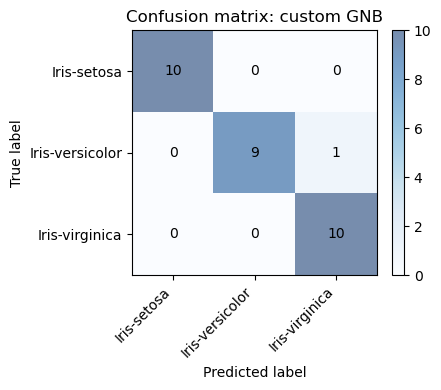

In [10]:
# visualize the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


species = np.unique(data['Species'])
cm = confusion_matrix(y_test, y_pred, labels=range(len(species)))

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, cmap='Blues', alpha=0.55)  # lighter colors for readability
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(range(len(species)))
ax.set_yticks(range(len(species)))
ax.set_xticklabels(species, rotation=45, ha='right')
ax.set_yticklabels(species)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Confusion matrix: custom GNB')
plt.tight_layout()
plt.show()


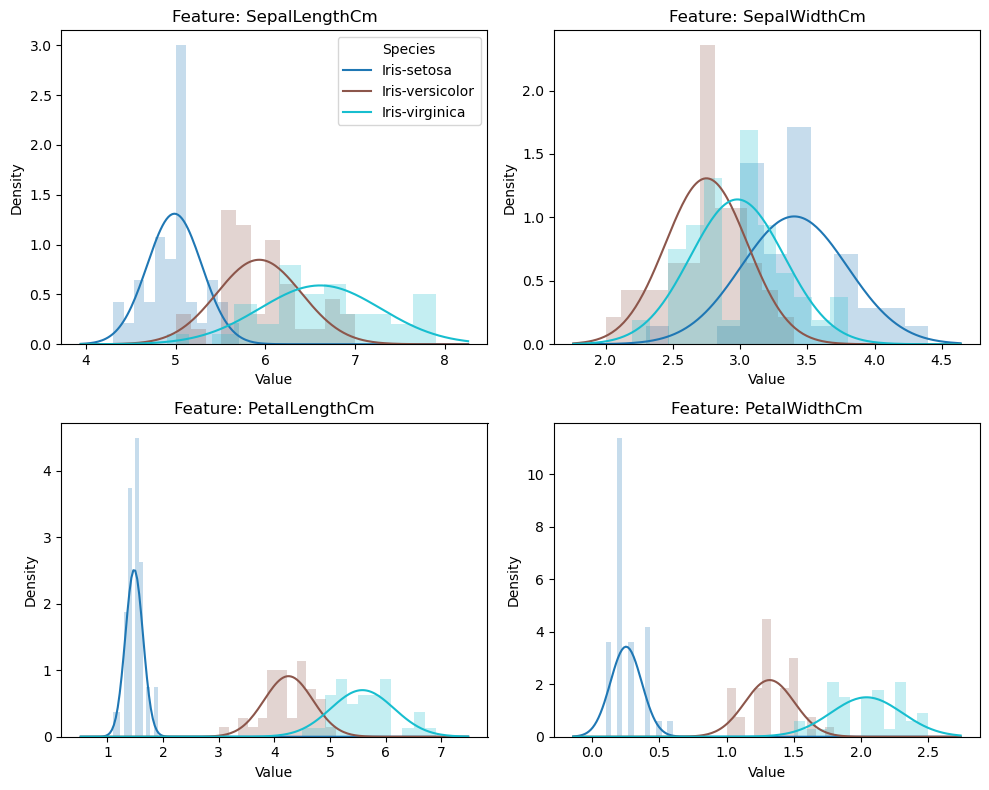

In [11]:

# visualize class-conditional densities P(x_j | y) on the training data


species = np.unique(data['Species'])
X_cols = data.drop(columns=['Species', 'Id']).columns
colors = plt.cm.tab10(np.linspace(0, 1, len(species)))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for fi, ax in enumerate(axes.ravel()):
    x_vals = X_train[:, fi]
    x_min, x_max = x_vals.min(), x_vals.max()
    xs = np.linspace(x_min - 0.1 * (x_max - x_min), x_max + 0.1 * (x_max - x_min), 200)

    for cls in range(model.n_classes):
        mean = model.means[cls, fi]
        var = model.vars[cls, fi]
        pdf = (1.0 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((xs - mean) ** 2) / var)
        ax.plot(xs, pdf, color=colors[cls], label=species[cls] if fi == 0 else None)
        ax.hist(x_vals[y_train == cls], bins=12, density=True, color=colors[cls], alpha=0.25)

    ax.set_title(f"Feature: {X_cols[fi]}")
    ax.set_ylabel('Density')
    ax.set_xlabel('Value')

axes[0, 0].legend(title='Species')
plt.tight_layout()
plt.show()


## Citations

Murphy, K.P. (2012) Machine Learning: A Probabilistic Perspective. Cambridge, MA: MIT Press, pp. 82–87. Available at: https://share.google/5aBIqD3u5fEWV1Opg

Domingos, P. and Pazzani, M. (1997) ‘On the optimality of the simple Bayesian classifier under zero-one loss’, Machine Learning, 29(2–3), pp. 103–130. Available at: https://gwern.net/doc/ai/1997-domingos.pdf
